In [30]:
import pandas as pd
dataframe = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
dataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [32]:
dataframe.duplicated().sum()

np.int64(0)

In [33]:
dataframe.dropna(subset=['Attrition'], inplace=True)

In [34]:
dataframe.drop_duplicates(inplace=True)

In [35]:
binary_categorical_columns = ['Gender', 'Over18', 'OverTime']
nonbinary_categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 
                      'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                      'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours','StockOptionLevel', 
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                      'YearsWithCurrManager']

for col in binary_categorical_columns:
    mode_value = dataframe[col].mode().iloc[0]
    dataframe[col] = dataframe[col].fillna(mode_value)

for col in nonbinary_categorical_columns:
    mode_value = dataframe[col].mode().iloc[0]
    dataframe[col] = dataframe[col].fillna(mode_value)

for col in numerical_columns:
    dataframe[col] = dataframe[col].fillna(dataframe[col].mean())
    dataframe[col] = dataframe[col].infer_objects(copy=False)

In [36]:
features = dataframe.drop('Attrition', axis=1)
target = dataframe['Attrition']

In [37]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
target = labelEncoder.fit_transform(target)

In [38]:
target

array([1, 0, 1, ..., 0, 0, 0])

In [39]:
for bin_Column_Name in binary_categorical_columns:
    features[bin_Column_Name] = labelEncoder.fit_transform(features[bin_Column_Name])

In [40]:
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [41]:
pd.set_option('display.max_columns', None)

In [42]:
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [43]:
features = pd.get_dummies(features, columns=nonbinary_categorical_columns, drop_first=True)

In [ ]:
features

In [ ]:
dataframe

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scaling method: 1->Standard, 2->MinMax
scaling_method = 2

def scaler_assignement(scaling_method):
    if scaling_method == 1:
        return StandardScaler()
    elif scaling_method == 2:
        return MinMaxScaler()
    else:
        print("Invalid Scaler")
        return None
    
scaler = scaler_assignement(scaling_method)

In [49]:
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

In [50]:
features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0,1,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0,0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0,1,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0,1,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0,0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,1,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0,0,0.428571,0.0,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,1,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0,0,0.285714,0.0,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,1,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,0,1,0.642857,1.0,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,1,0.471429,0.333333,0.25,0.333333,0.230700,0.447661,0.222222,0,0,0.214286,0.0,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,True,False,False,True,False,False,True,False,False,False,False,False

In [51]:
feature_columns = features.columns

for col in feature_columns:
    if col not in numerical_columns:
        features[col] = labelEncoder.fit_transform(features[col])

In [52]:
features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0,1,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0,0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0,1,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0,1,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0,0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,1,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0,0,0.428571,0.0,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,1,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0,0,0.285714,0.0,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,1,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,0,1,0.642857,1.0,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,1,0.471429,0.333333,0.25,0.333333,0.230700,0.447661,0.222222,0,0,0.214286,0.0,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [53]:
target

array([1, 0, 1, ..., 0, 0, 0])

In [54]:
target_df = pd.DataFrame(target, columns=['Attrition'])
target_series = target_df['Attrition']

In [55]:
correlations = features.corrwith(target_series)
correlations

c:\Users\huzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\huzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
Over18                                    NaN
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                  

In [56]:
absolute_correlations = correlations.abs()
absolute_correlations

Age                                  0.159205
DailyRate                            0.056652
DistanceFromHome                     0.077924
Education                            0.031373
EmployeeCount                             NaN
EmployeeNumber                       0.010577
EnvironmentSatisfaction              0.103369
Gender                               0.029453
HourlyRate                           0.006846
JobInvolvement                       0.130016
JobLevel                             0.169105
JobSatisfaction                      0.103481
MonthlyIncome                        0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
Over18                                    NaN
OverTime                             0.246118
PercentSalaryHike                    0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction             0.045872
StandardHours                             NaN
StockOptionLevel                  

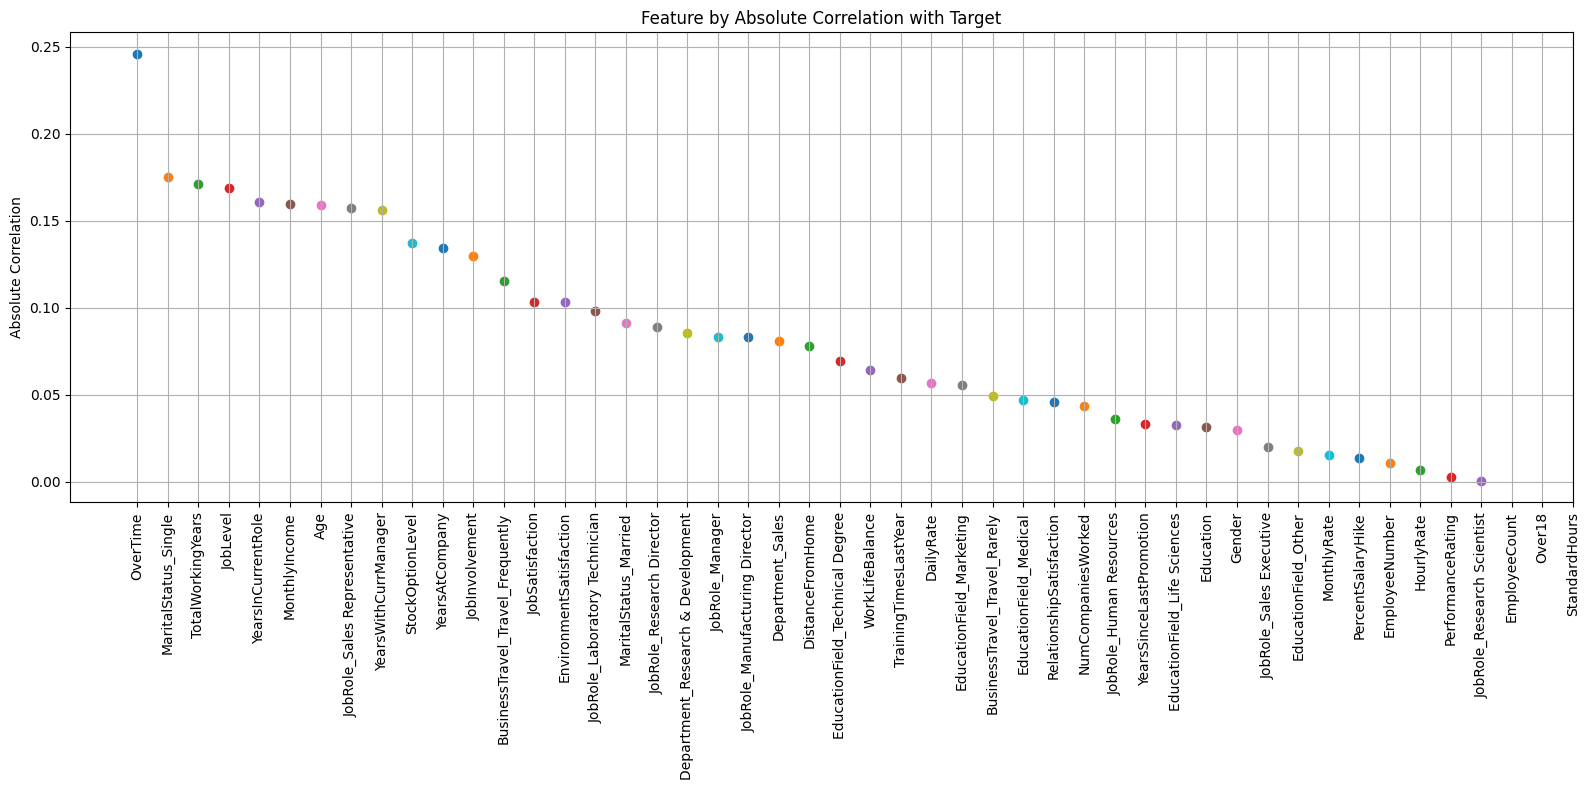

In [57]:
import matplotlib.pyplot as plt

sorted_correlations = absolute_correlations.sort_values(ascending=False)

plt.figure(figsize=(16,8))

for i, feature in enumerate(sorted_correlations.index):
    plt.scatter(i, sorted_correlations[feature], label=feature)

plt.title('Feature by Absolute Correlation with Target')
plt.ylabel('Absolute Correlation')
plt.xticks(range(len(sorted_correlations)), sorted_correlations.index, rotation=90)

plt.grid(True)

plt.tight_layout()
plt.show()

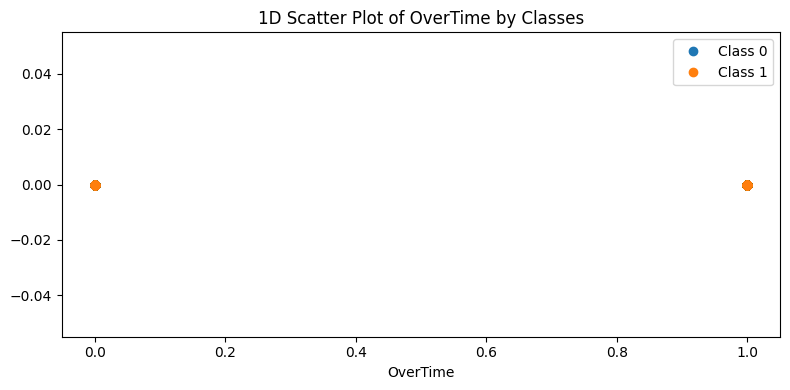

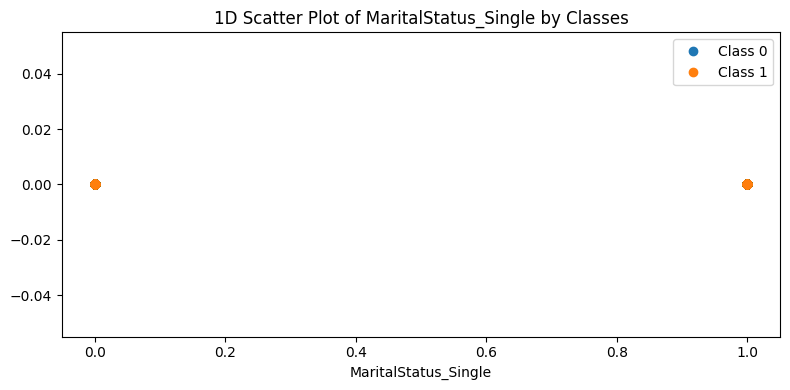

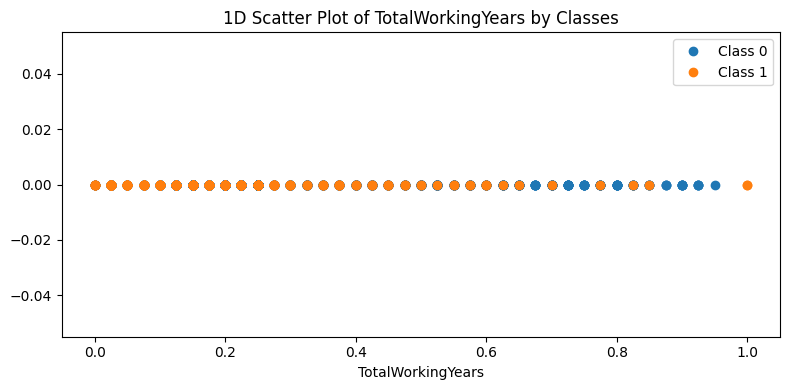

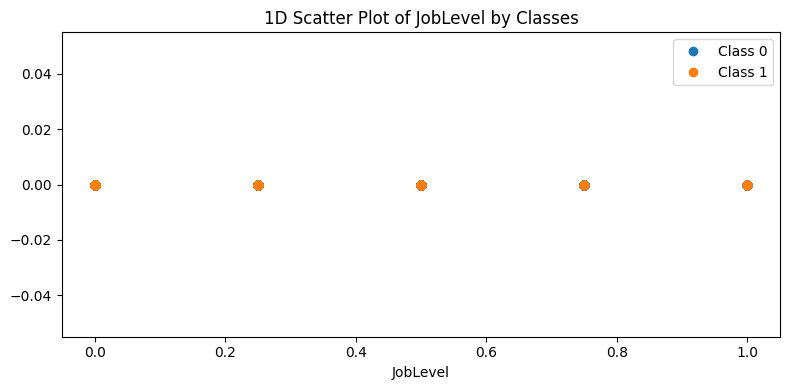

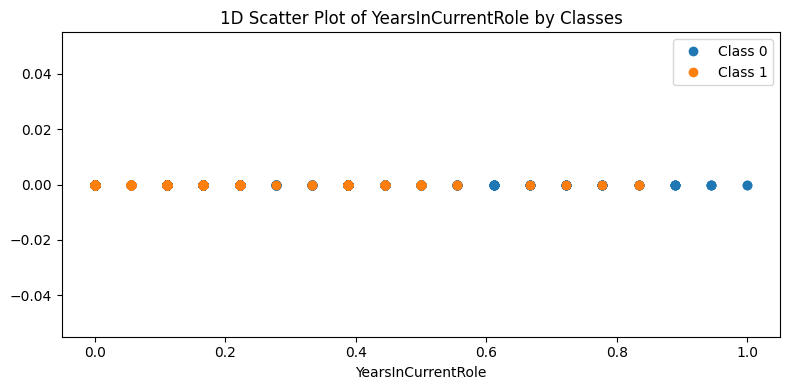

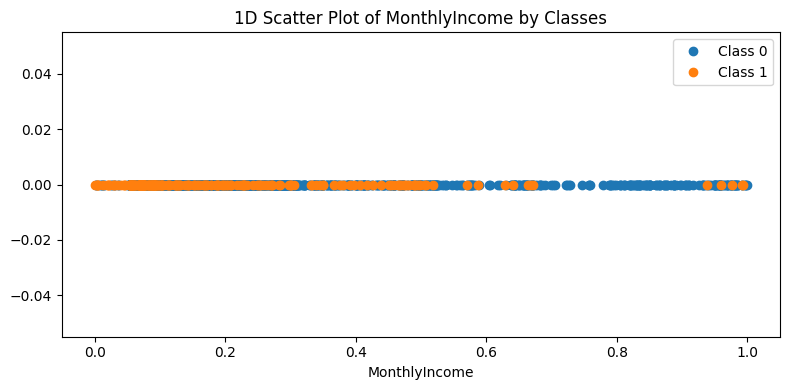

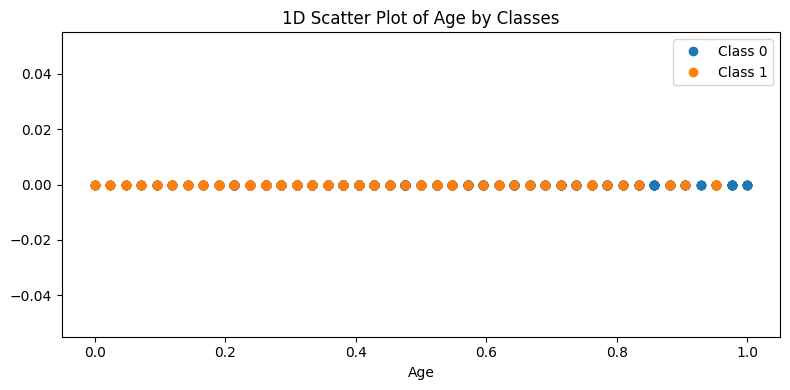

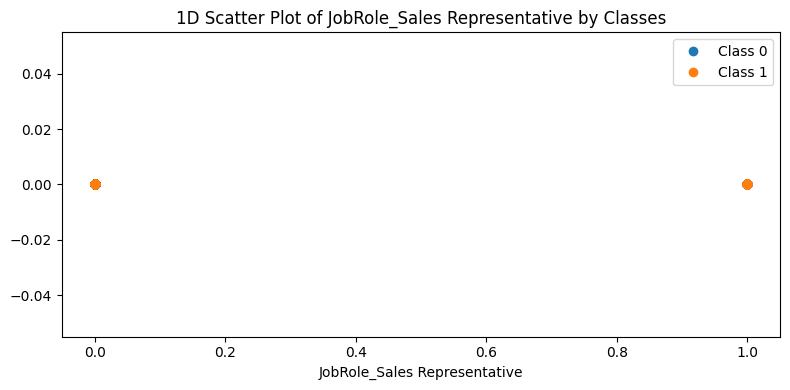

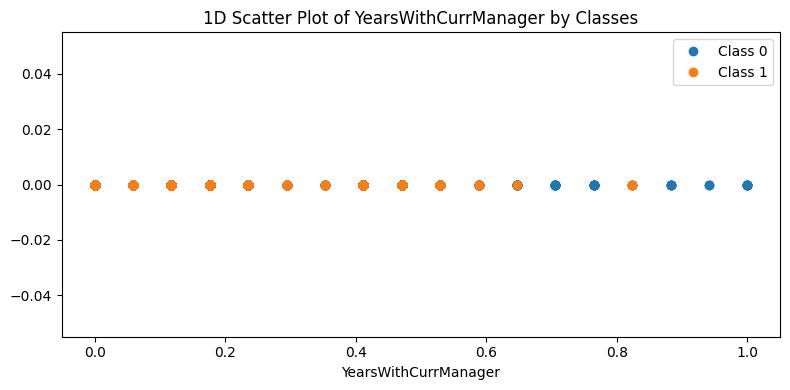

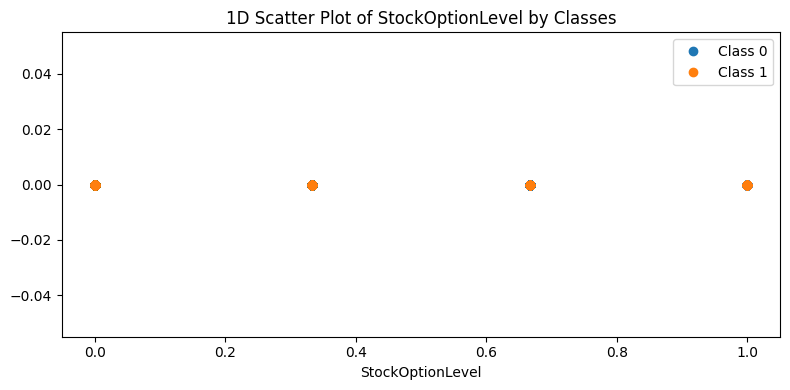

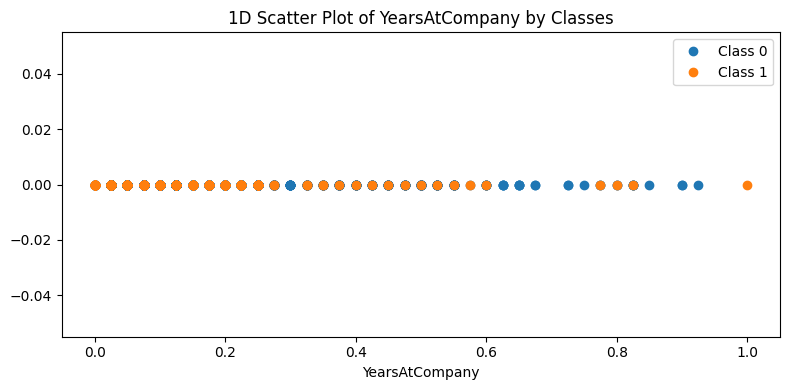

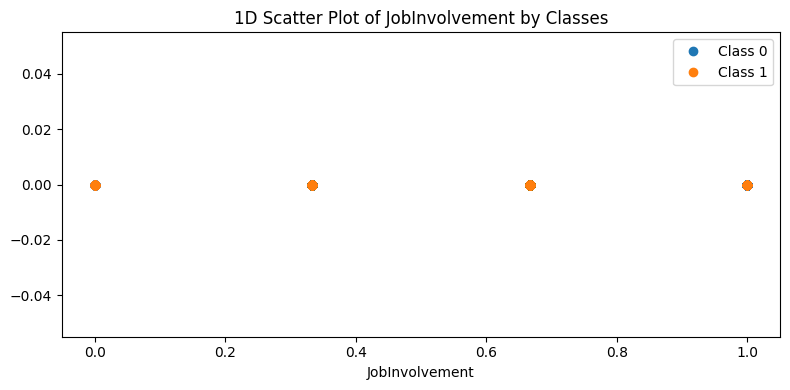

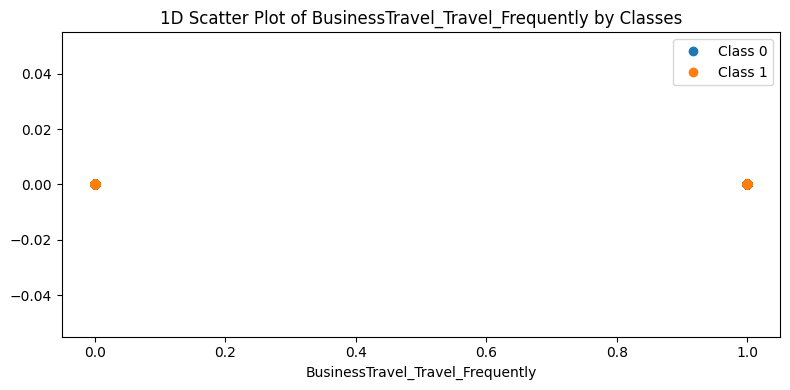

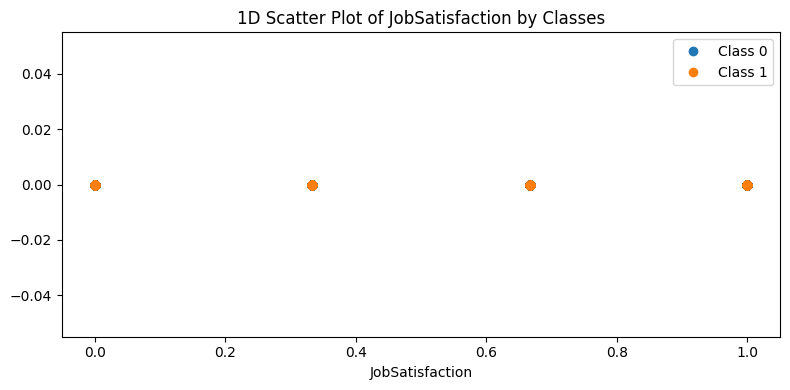

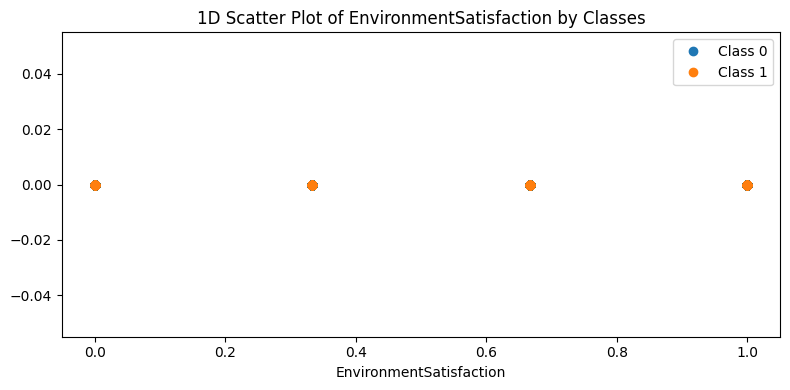

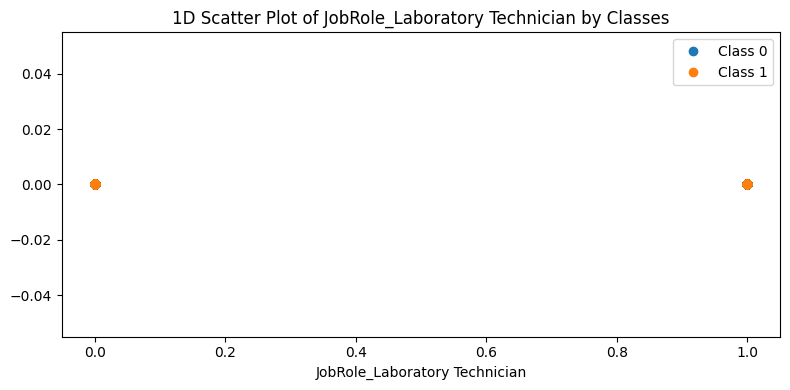

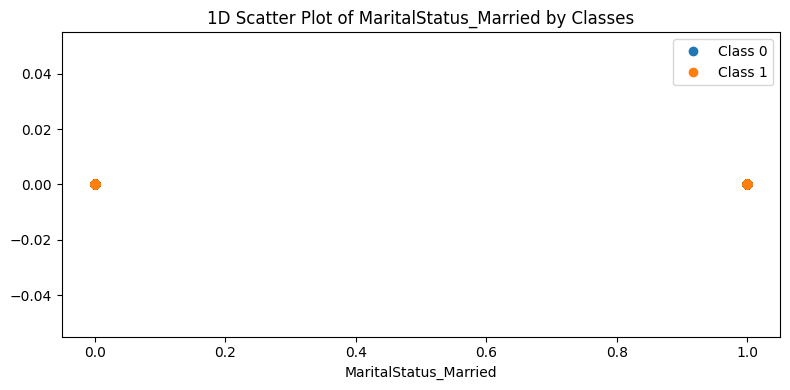

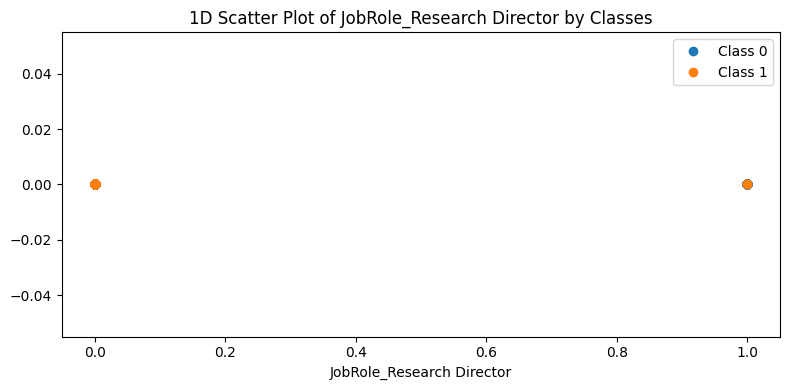

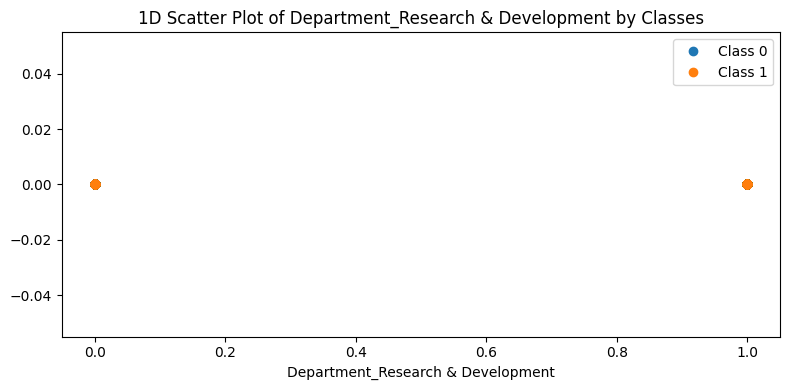

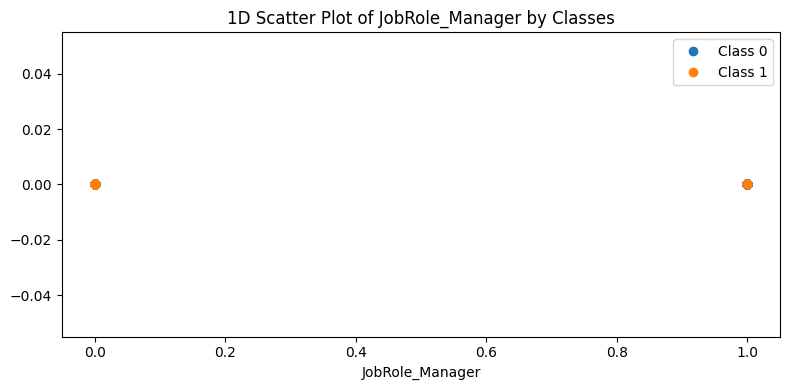

In [58]:
import numpy as np

top20_features = absolute_correlations.sort_values(ascending=False).head(20).index

for feature in top20_features:
    class_0 = features.loc[target_df["Attrition"] == 0]
    class_1 = features.loc[target_df["Attrition"] == 1]

    plt.figure(figsize=(8,4))

    plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label='Class 0')
    plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label='Class 1')

    plt.legend()
    plt.xlabel(feature)
    plt.title(f'1D Scatter Plot of {feature} by Classes')

    plt.tight_layout()
    plt.show()

In [ ]:
features

In [ ]:
type(features)

In [ ]:
type(target)

In [59]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(features,target, test_size=0.2,random_state=42)
 
clf=LogisticRegression()
 
clf.fit(X_train,y_train)
 
y_pred=clf.predict(X_test)
 
accuracy=accuracy_score(y_test,y_pred)
print(f"AccuracyofLogisticRegressionclassifier:{accuracy:.2f}")


AccuracyofLogisticRegressionclassifier:0.89
